Topic:        Challenge Set 3  
Subject:      Pandas (Exploring and visualizing our scraped movie data in pandas)  
Date:         01/20/2018  
Name:         Christine Chen

**Challenge 1**

Plot domestic total gross over time.

In [57]:
import pandas as pd
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from datetime import date as dt

%matplotlib inline

In [58]:
#read data and preview first few observations
df = pd.read_csv('../../../../challenges/challenges_data/2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB
None


In [60]:
#check dimensions of df
df.shape

(100, 7)

In [61]:
#check column names
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [62]:
#detect missing values
df.isnull().sum()

Title                  0
Budget                11
DomesticTotalGross     0
Director               4
Rating                 0
Runtime                0
ReleaseDate            0
dtype: int64

In [63]:
#convert ReleaseDate object to datetime object
df['ReleaseDateinDatetime'] = pd.to_datetime(df['ReleaseDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                    100 non-null object
Budget                   89 non-null float64
DomesticTotalGross       100 non-null int64
Director                 96 non-null object
Rating                   100 non-null object
Runtime                  100 non-null int64
ReleaseDate              100 non-null object
ReleaseDateinDatetime    100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.3+ KB


In [64]:
#format date strings with explicit formatting
df['ReleaseDateMonthDate'] = df['ReleaseDateinDatetime'].dt.strftime('%m/%d')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseDateinDatetime,ReleaseDateMonthDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,2013-11-22,11/22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,2013-05-03,05/03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,2013-11-22,11/22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,2013-07-03,07/03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,2013-06-14,06/14


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
Title                    100 non-null object
Budget                   89 non-null float64
DomesticTotalGross       100 non-null int64
Director                 96 non-null object
Rating                   100 non-null object
Runtime                  100 non-null int64
ReleaseDate              100 non-null object
ReleaseDateinDatetime    100 non-null datetime64[ns]
ReleaseDateMonthDate     100 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 7.1+ KB


In [66]:
df.groupby(['ReleaseDateMonthDate']).sum()

,Budget,DomesticTotalGross,Runtime
ReleaseDateMonthDate,,,
01/04,NaN,34341945,92
01/11,62500000.0,86042586,193
01/18,15000000.0,71628180,100
01/25,50000000.0,55703475,88
02/01,35000000.0,66380662,97
02/08,35000000.0,166679677,217
02/14,120000000.0,138698318,212
02/15,40000000.0,57012977,89
02/22,NaN,42930462,112


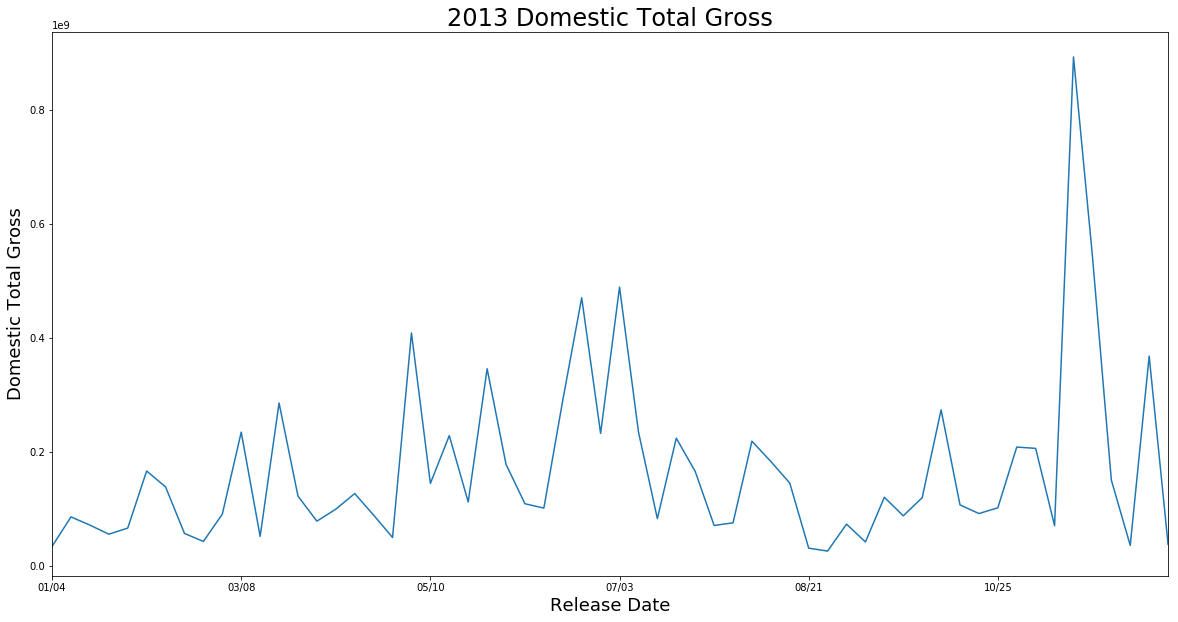

In [67]:
# plot data
fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().plot(ax=ax)

#fig labels
plt.xlabel('Release Date', fontsize =18)
plt.ylabel('Domestic Total Gross', fontsize =18)
plt.title('2013 Domestic Total Gross', fontsize =24)

In [68]:
#check values in the figure above
print(df.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().min())
print(df.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().max())

26004851
893780141


**Challenge 2**

Plot runtime vs. domestic total gross.

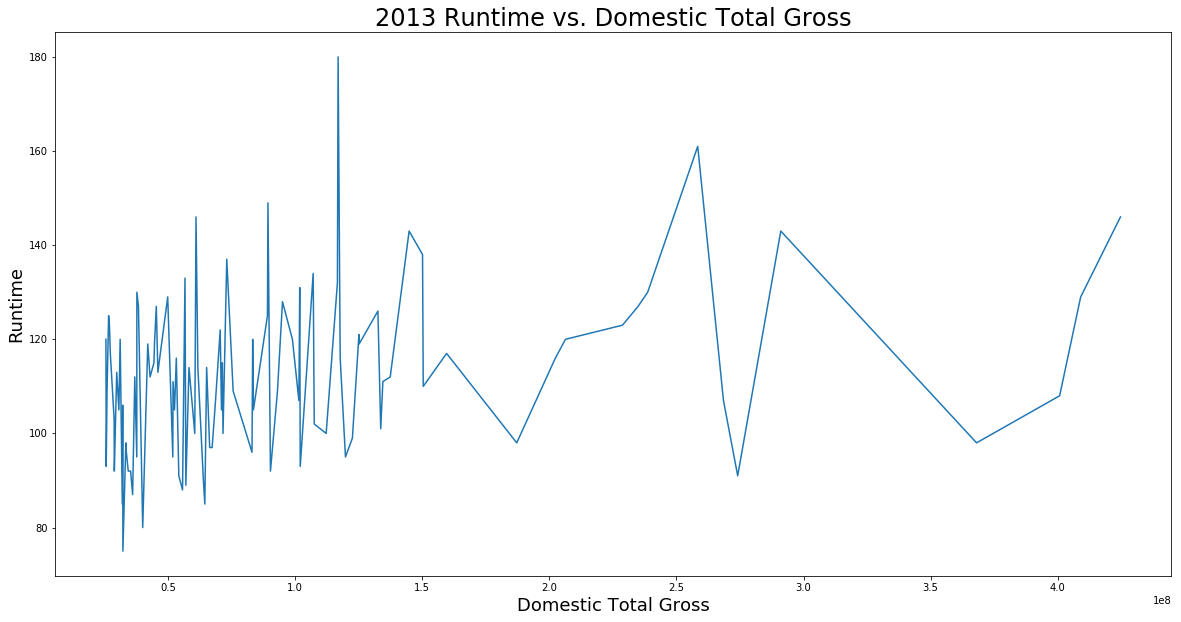

In [69]:
# plot data
plt.figure(figsize=(20,10))
plt.plot(df.DomesticTotalGross,df.Runtime)

#fig labels
plt.xlabel('Domestic Total Gross', fontsize =18)
plt.ylabel('Runtime', fontsize =18)
plt.title('2013 Runtime vs. Domestic Total Gross', fontsize =24)

In [70]:
#check values in the figure above
print(df.Runtime.max())
print(df.Runtime.min())

180
75


**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [71]:
df.groupby('Rating')[['Runtime','DomesticTotalGross',]].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [72]:
#check number of datapoints in each ratings category
df.Rating.value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

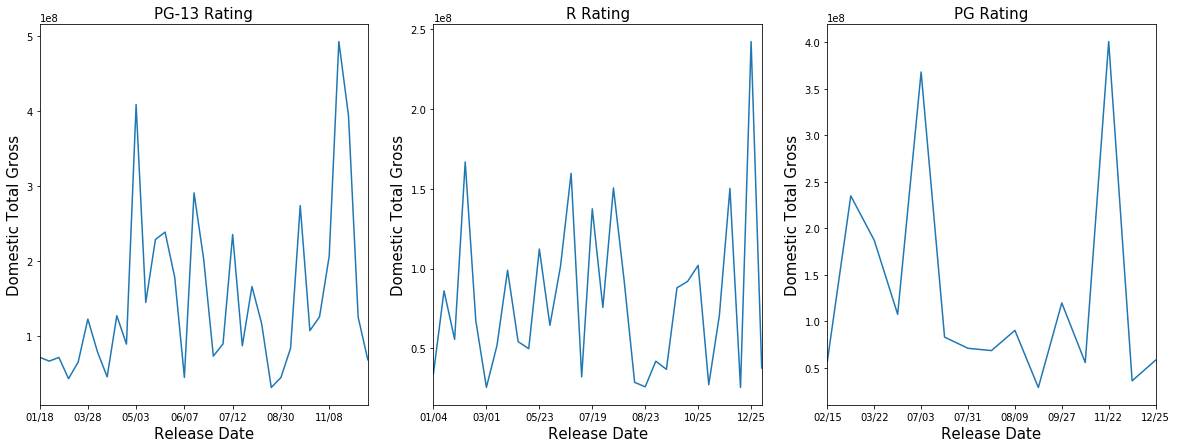

In [73]:
#plot
fig, ax = plt.subplots(1,3, figsize=[20,7])

#PG-13 rating
df2 = df
df2 = df[df['Rating'] == 'PG-13']
df2.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().plot(ax=ax[0])
#fig labels
ax[0].set_xlabel('Release Date', fontsize =15)
ax[0].set_ylabel('Domestic Total Gross', fontsize =15)
ax[0].set_title('PG-13 Rating', fontsize =15)

#R rating
df1 = df
df1 = df[df['Rating'] == 'R']
df1.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().plot(ax=ax[1])
#fig labels
ax[1].set_xlabel('Release Date', fontsize =15)
ax[1].set_ylabel('Domestic Total Gross', fontsize =15)
ax[1].set_title('R Rating', fontsize =15)

#PG rating
df3 = df
df3 = df[df['Rating'] == 'PG']
df3.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().plot(ax=ax[2])
#fig labels
ax[2].set_xlabel('Release Date', fontsize =15)
ax[2].set_ylabel('Domestic Total Gross', fontsize =15)
ax[2].set_title('PG Rating', fontsize =15)

In [74]:
#check values in PG13 rated figure above
print(df2.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().min())
print(df2.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().max())

31165421
493042132


In [75]:
#check values in R rated figure above
print(df1.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().min())
print(df1.groupby(['ReleaseDateMonthDate']).DomesticTotalGross.sum().max())

25568251
241996295


In [76]:
#G rating
df4 = df
df4 = df[df['Rating'] == 'G']
df4

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseDateinDatetime,ReleaseDateMonthDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00,2013-06-21,06/21


The G rated movie is a single observation, so I decided not to include it in the plot above.

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [77]:
#check if there are directors that occur more than once on the list
df['Director'].value_counts()

Tyler Perry                   2
James Wan                     2
Malcolm D. Lee                2
Ruben Fleischer               1
Carl Rinsch                   1
Dean Parisot                  1
Jon Turteltaub                1
Baz Luhrmann                  1
Edgar Wright                  1
David Twohy                   1
Neill Blomkamp                1
Michael Tiddes                1
Jeff Wadlow                   1
Guillermo del Toro            1
Pierre CoffinChris Renaud     1
Paul Greengrass               1
Andres Muschietti             1
Robert Schwentke              1
John Luessenhop               1
Louis Leterrier               1
Dan Scanlon                   1
Justin Lin                    1
Martin Scorsese               1
Lee Daniels                   1
Cal Brunker                   1
John Wells                    1
Evan GoldbergSeth Rogen       1
Jimmy Hayward                 1
Raja Gosnell                  1
J.J. Abrams                   1
                             ..
Andrew N

In [78]:
(df
 .sort_values(by='DomesticTotalGross', ascending=[False])
 .groupby('Director')
 .head())

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseDateinDatetime,ReleaseDateMonthDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,2013-11-22,11/22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,2013-05-03,05/03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,2013-11-22,11/22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,2013-07-03,07/03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,2013-06-14,06/14
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00,2013-10-04,10/04
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00,2013-06-21,06/21
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00,2013-12-13,12/13
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00,2013-05-24,05/24
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00,2013-03-08,03/08


In [79]:
df.iloc[0].Director

'Francis Lawrence'

**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [82]:
#add column, ReleaseDateMonth
#format date strings with explicit formatting
df['ReleaseDateMonth'] = df['ReleaseDateinDatetime'].dt.strftime('%m')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseDateinDatetime,ReleaseDateMonthDate,ReleaseDateMonth
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,2013-11-22,11/22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,2013-05-03,05/03,05
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,2013-11-22,11/22,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,2013-07-03,07/03,07
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,2013-06-14,06/14,06


In [92]:
df.groupby('ReleaseDateMonth')['DomesticTotalGross'].mean()

ReleaseDateMonth
01    4.954324e+07
02    6.738601e+07
03    9.609710e+07
04    6.094072e+07
05    1.774097e+08
06    1.506500e+08
07    1.057807e+08
08    6.853126e+07
09    6.171231e+07
10    1.150270e+08
11    1.379368e+08
12    8.748339e+07
Name: DomesticTotalGross, dtype: float64

In [105]:
stderr = df.groupby('ReleaseDateMonth')['DomesticTotalGross'].sem()
print(stderr)
print(stderr.dtype)

ReleaseDateMonth
01    6.555914e+06
02    1.240927e+07
03    2.441314e+07
04    1.032911e+07
05    3.951859e+07
06    3.365826e+07
07    2.638732e+07
08    1.245915e+07
09    1.421654e+07
10    4.201272e+07
11    4.857293e+07
12    1.853759e+07
Name: DomesticTotalGross, dtype: float64
float64


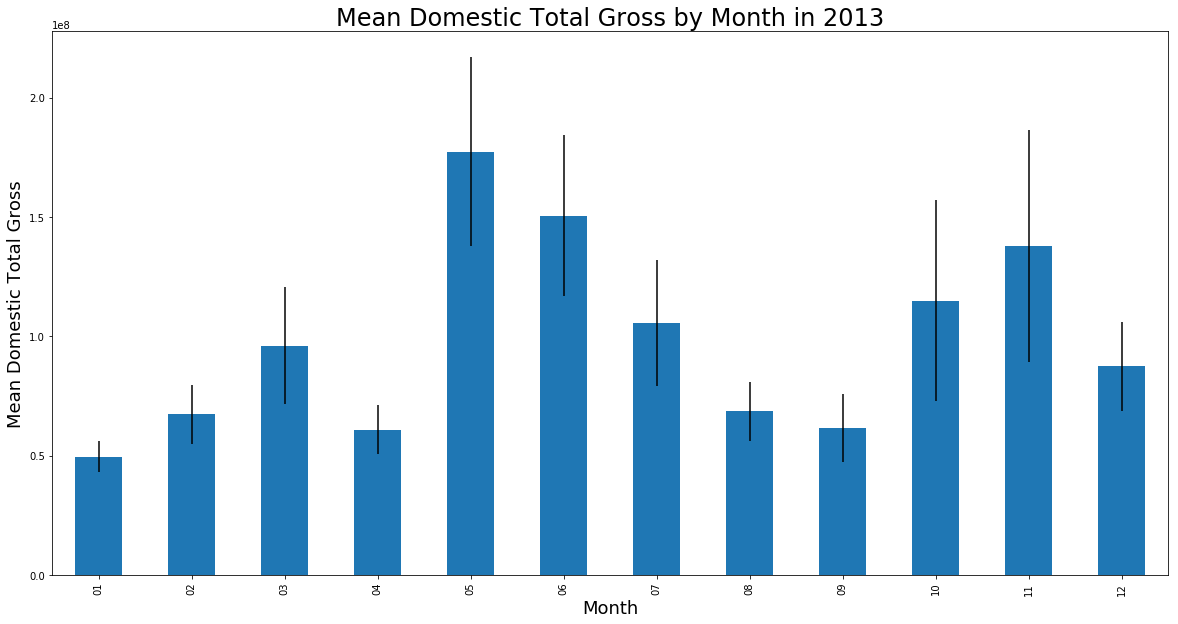

In [106]:
# plot data
fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['ReleaseDateMonth']).DomesticTotalGross.mean().plot(ax=ax, kind='bar', yerr=stderr)

#fig labels
plt.xlabel('Month', fontsize =18)
plt.ylabel('Mean Domestic Total Gross', fontsize =18)
plt.title('Mean Domestic Total Gross by Month in 2013', fontsize =24)